# Create average monthly 2m temperature from ERA5


In [38]:
import geoutils.plotting.plots as gplt
import geoutils.geodata.base_dataset as bds
import geoutils.utils.spatial_utils as sput
import geoutils.utils.time_utils as tut
from importlib import reload
# Set parameters and paths
datapath = '../../data/t2m/2m_temperature_monthly_1979_2020.nc'
datapath = '/home/strnad/data/era5/2m_temperature/2m_temperature_sfc_1979_2020_mon_mean.nc'

### Read file to a BaseDataset plot
The data is interpolated to an lon-lat grid of 1°x1° resolution.

The dataset class will also create anomaly time series of the input time series with respect to day of year.

Moreover, the data is not detrended.

In [37]:
reload(bds)
ds = bds.BaseDataset(data_nc=datapath,
                    grid_step=1,
                    detrend=False,
                    can=True)


Start processing data!
['time', 'longitude', 'latitude']
Rename:longitude : lon 
['time', 'lon', 'latitude']
['time', 'lon', 'latitude']
Rename:latitude : lat 
['time', 'lon', 'lat']
Shift longitude!
Sort longitudes and latitudes in ascending order, respectively
Interpolte grid from -180.0 to 179.75,-90.0 to 90.0!
Finished processing data
Set variable name to t2m!
Created dayofyearly anomalies!
Rename t2m to t2m_an_dayofyear!
Init the point-idx dictionaries


252.0623576433866 299.4711733752344
252.0623576433866 299.4711733752344
[252.1 261.5 271.  280.5 290.  299.5]


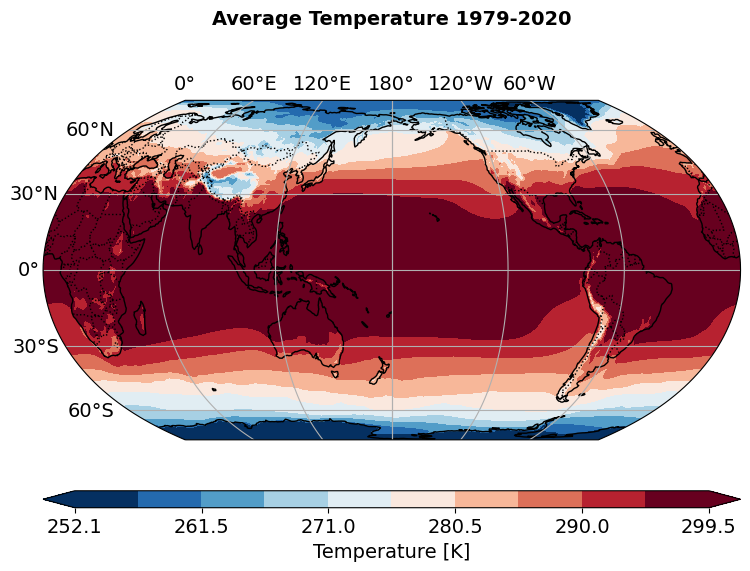

In [69]:
reload(gplt)
global_mean = ds.ds['t2m'].mean(dim='time')
im = gplt.plot_map(global_mean,
                   cmap='RdBu_r',
                   projection='EqualEarth',
                   title=r'Average Temperature 1979-2020',
                   plot_type='contourf',
                   levels=10,
                  #  vmin=252.1, vmax=299.4,
                   plt_grid=True,
                   orientation='horizontal',
                   central_longitude=180,
                #    significance_mask=None,
                   sci=None,
                   label='Temperature [K]',
                   round_dec=1,
                   tick_step=2
                   )


### Compute average time series for years and month globally

Compute yearly means of all variables!


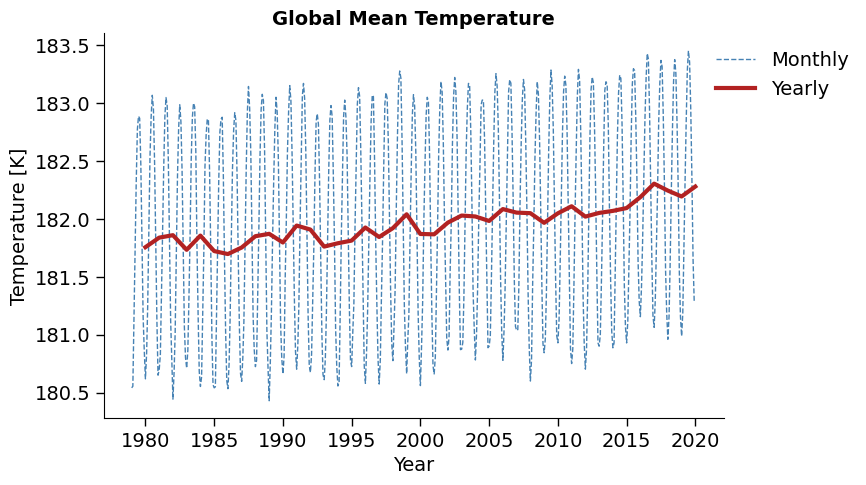

In [53]:
reload(sput)
reload(tut)
t_data = ds.ds['t2m']
global_temperature = sput.compute_zonal_mean(sput.compute_meridional_mean(t_data))
global_temperature_year = tut.compute_timemean(ds=global_temperature, timemean='year')

im = gplt.plot_xy(
    x_arr=[t_data.time, global_temperature_year.time],
    y_arr=[global_temperature, global_temperature_year],
    lw_arr=[1, 3],
    ls_arr=['--', '-'],
    label_arr=['Monthly', 'Yearly'],
    loc='outside',
    xlabel='Year',
    ylabel='Temperature [K]',
    title='Global Mean Temperature',
    y_title=1.0
)

### Create instances of monthly means 

Here we create average monthly values 

In [45]:
ds_month = {}
for mon in tut.months:
    ds_month[mon] = tut.get_month_range_data(dataset=t_data,
                                           start_month=mon,
                                           end_month=mon).mean(dim='time')

### Plot multiple plots in one figure


/home/strnad/climnet/geoutils/geoutils/plotting/map_plots.py:773: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


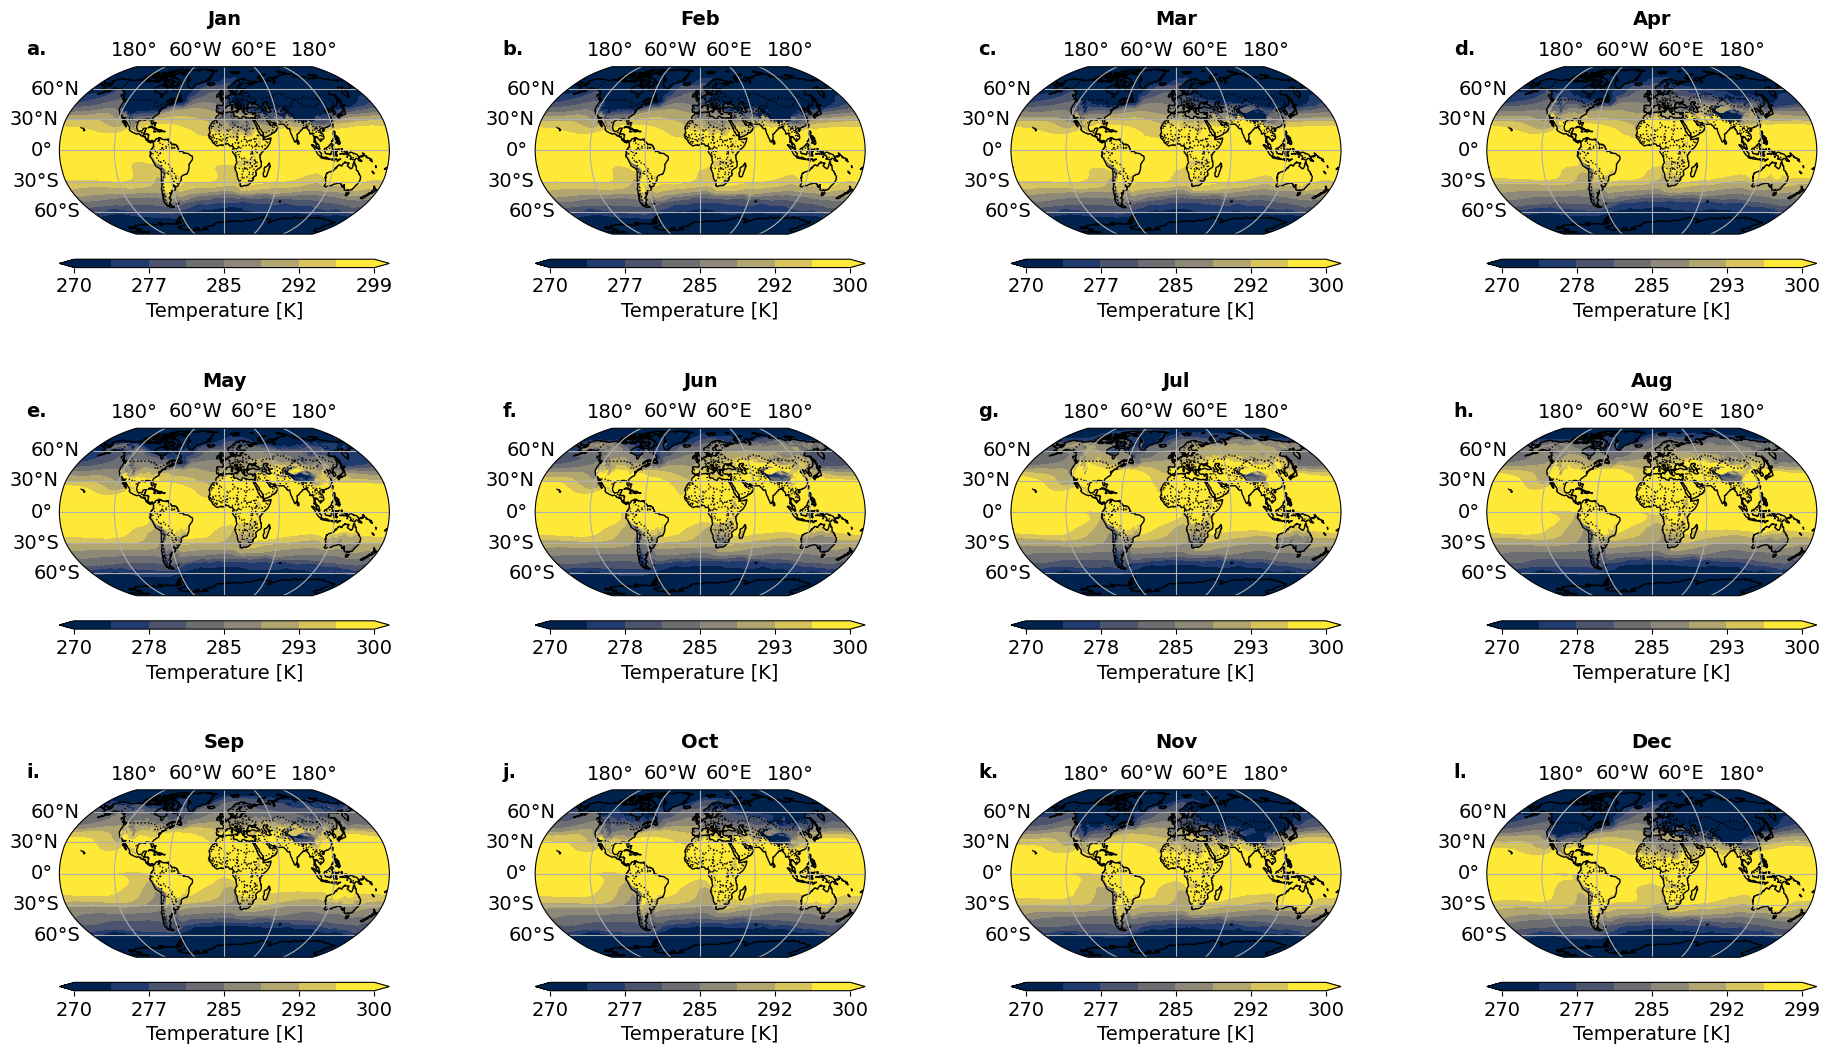

In [72]:
reload(gplt)
im = gplt.create_multi_plot(nrows=3, ncols=4,
                            projection='Robinson',
                            central_longitude=0,
                            wspace=0.1, hspace=0.8)


for j, mon in enumerate(tut.months):
    mon_mean = ds_month[mon]
    im_comp = gplt.plot_map(dmap=mon_mean,
                            ax=im['ax'][j],
                            fig=im['fig'],
                            plot_type='contourf',
                            cmap='cividis',
                            vmin=270,
                            title=f"{mon}",
                            plt_grid=True,
                            label=f'Temperature [K]',
                            orientation='horizontal',
                            tick_step=2,
                            round_dec=0,
                            )